In [7]:
import torch
import numpy as np
from cmr.estimation import estimation
import matplotlib.pyplot as plt

In [8]:
# Generate some data
def generate_data(n_sample):
    e = np.random.normal(loc=0, scale=1.0, size=[n_sample, 1])
    gamma = np.random.normal(loc=0, scale=0.1, size=[n_sample, 1])
    delta = np.random.normal(loc=0, scale=0.1, size=[n_sample, 1])

    z = np.random.uniform(low=-3, high=3, size=[n_sample, 1])
    t = np.reshape(z[:, 0], [-1, 1]) + e + gamma
    y = np.abs(t) + e + delta
    return {"t": t, "y": y, "z": z}


train_data = generate_data(n_sample=1000)
validation_data = generate_data(n_sample=1000)
test_data = generate_data(n_sample=10000)


In [9]:
# Define a PyTorch model $f$ and a moment function $\psi$
model = torch.nn.Sequential(
    torch.nn.Linear(1, 20),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(20, 3),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(3, 1),
)

# Instrumental variable regression
def moment_function(model_evaluation, y):
    return model_evaluation - y

In [14]:
def fit_model(method, model=model):
    trained_model, stats = estimation(
        model=model,
        train_data=train_data,
        moment_function=moment_function,
        estimation_method=method,
        validation_data=validation_data,
        verbose=True,
    )
    return trained_model(torch.Tensor(test_data["t"]))

In [ ]:
smd_pred = fit_model(method="SMD")

Running hyperparams:  {}
Best hyperparams:  {}
Solving conditional MR problem with method for unconditional MR, ignoring instrument data `train_data['z']`.
Running hyperparams:  {'reg_param': 1e-08}
Running hyperparams:  {'reg_param': 1e-06}
Running hyperparams:  {'reg_param': 0.0001}


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:

gmm_pred = fit_model(method="GMM")
ols_pred = fit_model(method="OLS")

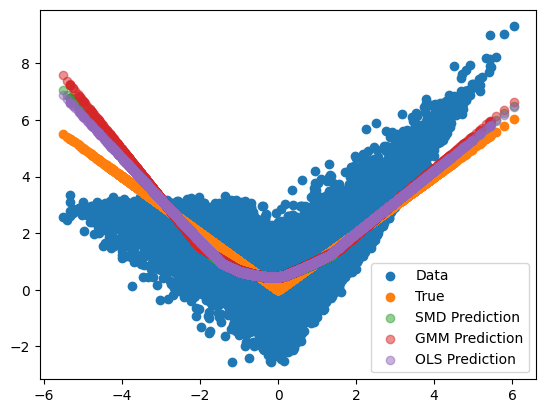

In [13]:
plt.scatter(test_data["t"], test_data["y"], label="Data")
plt.scatter(test_data["t"], np.abs(test_data["t"]), label="True")
plt.scatter(test_data["t"], smd_pred.detach().numpy(), alpha=0.5, label="SMD Prediction")
plt.scatter(test_data["t"], gmm_pred.detach().numpy(), alpha=0.5, label="GMM Prediction")
plt.scatter(test_data["t"], ols_pred.detach().numpy(), alpha=0.5, label="OLS Prediction")
plt.legend()